# linear regression

# regression problem

two or more variable linear relationship 

# regression problem

dependent variable is to be continue like numerical

# classification problem

predict the categorical variable

like yes or no,pass or fail,0 or 1

# all  machine algorithim use bothe regression and classification

# Linear regression 

In [1]:
from pandas.plotting import scatter_matrix

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas.plotting import sacatter_matrix
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame({'age':[20,22,25,30,35,40,37],'exp':[1,2,3,4,5,5,4.5],'salry(in thousand)':[20,25,30,35,40,40,36]})

In [4]:
df

,age,exp,salry(in thousand)
0,20,1.0,20
1,22,2.0,25
2,25,3.0,30
3,30,4.0,35
4,35,5.0,40
5,40,5.0,40
6,37,4.5,36


<AxesSubplot:xlabel='age', ylabel='exp'>

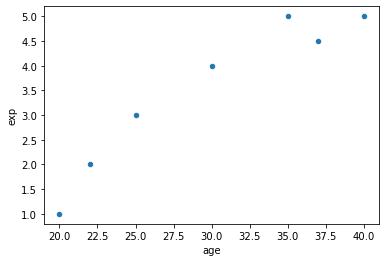

In [5]:
# this data find relation by using graph
df.plot.scatter(x='age',y='exp')

<AxesSubplot:xlabel='age', ylabel='exp'>

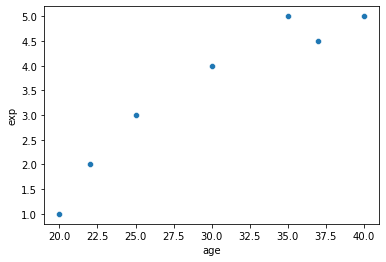

In [6]:
sns.scatterplot(x='age',y='exp',data=df)

<AxesSubplot:xlabel='age', ylabel='salry(in thousand)'>

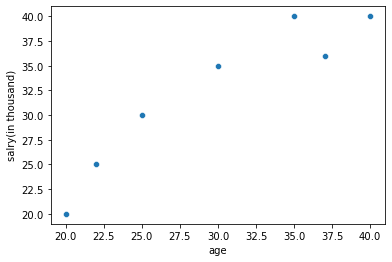

In [7]:
sns.scatterplot(x='age',y='salry(in thousand)',data=df)

<AxesSubplot:xlabel='exp', ylabel='salry(in thousand)'>

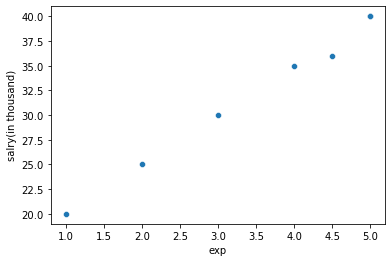

In [8]:
sns.scatterplot(x='exp',y='salry(in thousand)',data=df)

we can see proper in diagram thats all independent feature each other linearly relation.
and along with dependent variable linearly relation 

# load the data

linear regression two tyes

1)single feature or simple linear regression

2)multiple features or multi linear regression

# single or simple linear regression dicussed

In [9]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\data csv file\\advertising.csv")

In [10]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# prob. statement

1)find the tv sales


2)find the radio sales

3)find the newspaper sales

individullay investment sor we want to know how are the sales perticular sector

# next process data descrption

In [11]:
df.shape

(200, 4)

our data four columns and 200 row

In [12]:
df.columns#show the total columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
df.info()# check the data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


my dataset having value float datatype

In [14]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

no null values

In [15]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


find the stats soution

# stats and graphical data analysis

# check the outlier

<AxesSubplot:>

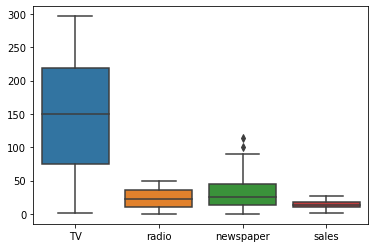

In [16]:
sns.boxplot(data=df)

In [17]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [18]:
df['radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

In [19]:
df['newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

we can see newspaper having some outliers

In [20]:
print('Highest allowed',df['newspaper'].mean()+3*df['newspaper'].std())
print('Lowest allowed',df['newspaper'].mean()-3*df['newspaper'].std())

Highest allowed 95.8898625155685
Lowest allowed -34.7818625155685


In [21]:
df = df[(df['newspaper']<95.8898)&(df['newspaper']>-34.7818625155685 )]

In [22]:
df['newspaper'].describe()

count    198.000000
mean      29.777273
std       20.446303
min        0.300000
25%       12.650000
50%       25.600000
75%       44.050000
max       89.400000
Name: newspaper, dtype: float64

<AxesSubplot:xlabel='newspaper'>

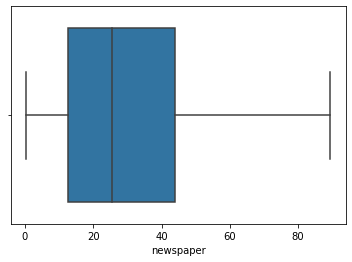

In [23]:
sns.boxplot(df['newspaper'])

oh good i removed outliers from newspaper 

In [24]:
df.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


# check the relation

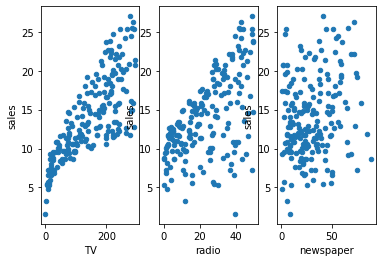

<Figure size 1800x1440 with 0 Axes>

In [25]:
fig ,axs = plt.subplots(1,3)
plt.figure(figsize=(25,20))
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0])
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('data.jpg')
plt.show()

we can see tv~sales linear realtion

we can see radio~sales linear relation

but we can see newspaper~sales not linear realtion

# check the distribution

<AxesSubplot:xlabel='TV', ylabel='Density'>

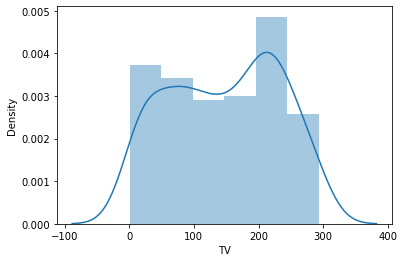

In [26]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

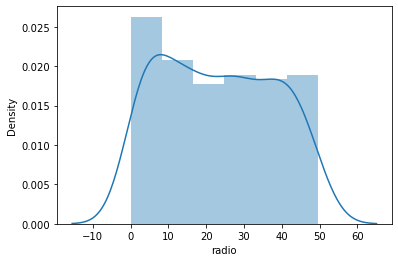

In [27]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

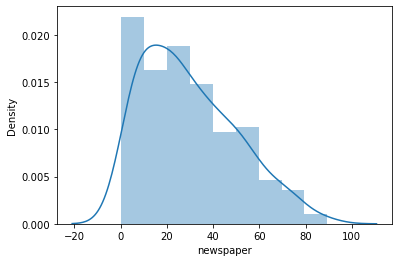

In [28]:
sns.distplot(df['newspaper'])

follow the normal distribution

# check the correlation

In [29]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


In [30]:
#correlation b/w 0.8to -0.8

<AxesSubplot:>

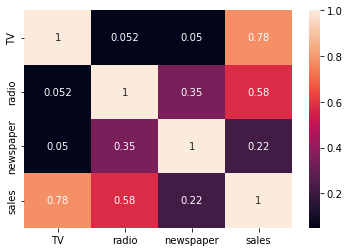

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
#correlation fit for lie range b/w 0.8 to -0.8

In [33]:
#y = mx + c
#x = independent variable
#m = coefficent

In [34]:
#best fit line or regression line
#resudual or error = actual value-predict value

# gradient descent

learning rate to arrive global minima

In [35]:
x = df[['TV']]
y = df.sales


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(x,y)

LinearRegression()

# find intercept and coef

In [39]:
lr.coef_

array([0.04738103])

In [40]:
lr.intercept_

7.030561456400218

# interpeting model

In [41]:
#y = mx +c
y = 0.04738103*230.1+7.030561456

In [42]:
y

17.932936459

In [43]:
actual_value = 20.0
predict_value = 17.93


In [44]:
rasidual = actual_value-predict_value

In [45]:
rasidual

2.0700000000000003

In [46]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [47]:
x_new = pd.DataFrame({'TV':['230.1']})

In [48]:
x_new

,TV
0,230.1


In [49]:
lr.predict(x_new)

array([17.93293632])

# hypothesis testing and pvalue

In [50]:
import statsmodels.formula.api as smf

In [51]:
lr = smf.ols(formula='sales~TV',data=df).fit()

In [53]:
lr.pvalues

Intercept    4.834823e-35
TV           1.286886e-41
dtype: float64

In [54]:
#null hypothesis = no relation tv and sales
#alternate hypothesis = yes relation tv and sales

# model confidence

# r2 statistic

In [55]:
lr.rsquared

0.6070293104334953

rsuared its use simple linear regression

model confidence=60%

# adjusted rsuared

adjusted rsquared its use multiple linear regression

# multi linear regression

In [57]:
#y = m1x1+m2x2......mxn

In [58]:
x = df[['TV','radio','newspaper']]
y = df.sales

In [60]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [63]:
lr.intercept_


2.952308567118184

In [64]:
lr.coef_[0]



0.045690341924578895

In [65]:
lr.coef_[1]



0.18855046885810486

In [66]:
lr.coef_[2]

-0.0011776635581814215

In [67]:
lr = smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()

In [68]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           8.35e-95
Time:                        17:25:21   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
radio          0.1886      0.009     21.772      0.000       0.171       0.206
newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# feature selection

In [69]:
lr = smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lr.rsquared

0.8953917183024751

In [70]:
lr = smf.ols(formula='sales~TV+radio',data=df).fit()
lr.rsquared

0.8953728420315047